# Untitled Supermarked Project
Goal of the project is to gain insights on retail behaviour combining Data Science and Queuing Theory.

## Setting up Workshop

### Importing Libraries

In [28]:
# DataFrames
import pandas as pd
# Visualizations
import matplotlib.pyplot as plt
# Fancy Visualizations
import seaborn as sns
# Statistics
from scipy import stats 
# Array and Array Math
import numpy as np
# Time
import datetime as dt
# Anonymize Data
from faker import Faker

### Settings

In [4]:
# Seed for Anonymizer
Faker.seed(0)
# Size of Graphs
plt.rcParams['figure.figsize'] = [10, 5]

## 01 : Import Data

Source: https://www.kaggle.com/agasca/retail-sales/data

In [5]:
data_raw = pd.read_csv(filepath_or_buffer = "Sales.csv")

## 02 : Clean Data
|Input|Tools & Techniques|Output|
|-|-|-|
|Raw Data|Select Features|Clean Data|
||Rename Features||
||Handle Feature Format||
||Outliers||
||Anonymize Data||

The dataset has no missing values.

### 02-01 : Select Features
The Dataset consists of 5 features: 'Folio', 'Hora', 'Total', 'Pago', and 'Cajero'. The first one bears no usefull information and will therefore be dropped.

In [6]:
data_cln = data_raw.drop('Folio', axis = 1)

### 02-02 : Rename Features
The 4 remaining Features will be translated for transparancy.

In [7]:
data_cln.columns = ['time','price','paid','cashier']

### 02-03 : Handle Feature Format
Turning the 'time' feature into timestamp.

In [8]:
data_cln.time = pd.to_datetime(data_cln.time, format='%Y-%m-%d %H:%M:%S')

### 02-04 : Handle Outliers
Identify and mend outliers.

In [9]:
diff = (data_cln.paid / data_cln.price)

In [10]:
data_cln[stats.zscore(diff)>3]

,time,price,paid,cashier
259,2018-05-01 12:16:24,100.4,7.503003e+12,ALE HUERTA
13511,2018-05-21 13:13:43,1039.7,7.501026e+12,JUAN MARTIN
37061,2018-06-25 14:23:50,176.6,7.210597e+11,ALE HUERTA


<i>I am using the ratio of price to paid as an indicator. Here are the ones where the Zscore ist above 3, but there are many more where the "paid" value does not make sense. However, this issue is not crucial, and therefore be dealt with at a later point of time.</i>

### 02-05 : Anonymize Data
It is unknown if the Data has been allready anonymized, therefore the feature "cashier" might contain the actual names of the cashiers. To be on the safe side, new names will be generated.

In [11]:
fake = Faker('es_MX')
list_of_cashiers = data_cln.cashier.unique()
for idx_cshr in list_of_cashiers:
    data_cln.loc[(data_cln.cashier == idx_cshr),['cashier']] = fake.first_name().lower().replace(" ","")

<i> Technically, the feature also gives the information about the gender of the cashier, which could be utilized for analysis. This will be ignored for now and may be implemented at a later point in time.</i><br>

## 03 : Data Analysis
|Input|Tools & Techniques|Output|
|-|-|-|
|Clean Data|Single Feature Analysis|Insights|
||Multiple Feature Analysis|Assumptions|

### 03-01 : Single Feature Analysis

#### 03-01-01 : Time

In [12]:
print("Dataset spans from",
      data_cln.time.min(),
      "to",data_cln.time.max(),
      ". A timeperiod of",
      data_cln.time.max()-data_cln.time.min(),
      ".")

Dataset spans from 2018-05-01 07:46:22 to 2018-08-31 21:13:28 . A timeperiod of 122 days 13:27:06 .


C:\Users\hrmnn\Anaconda3\envs\HRMNN\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


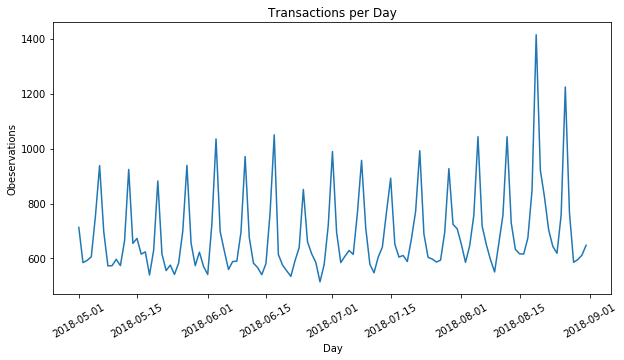

In [13]:
plt.title("Transactions per Day")
plt.plot(data_cln.resample("d", on = "time").count()["time"])
plt.ylabel("Obeservations")
plt.xlabel("Day")
plt.xticks(rotation = 30)
plt.show()

<b>Insights:</b><br>
- The market has between 500 and 1450 transactions every day.<br>
- There is a repeating pattern.<br>

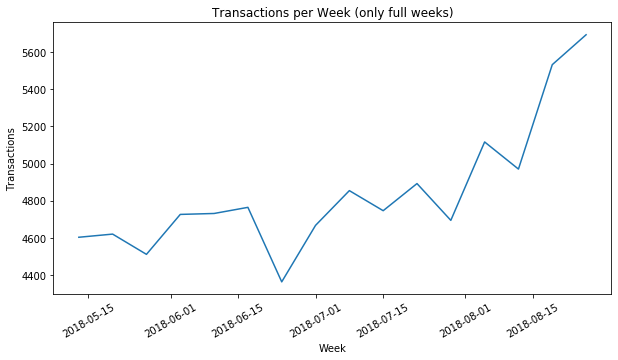

In [14]:
plt.title("Transactions per Week (only full weeks)")
plt.plot(data_cln.resample("W", on = "time").count()["time"][1:-1])
plt.ylabel("Transactions")
plt.xlabel("Week")
plt.xticks(rotation = 30)
plt.show()

<b>Insights:</b><br>
- The market has between 4350 and 5700 transactions every week.<br>
- It is stable around a 4600 transaction average for the first 10/11 weeks.
- But the number of transactions rises.<br>

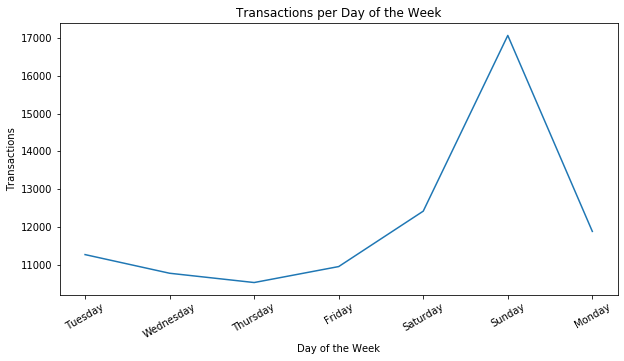

In [15]:
plt.title("Transactions per Day of the Week")
plt.plot(data_cln.groupby(data_cln.time.dt.day_name(), sort = False).time.count())
plt.ylabel("Transactions")
plt.xlabel("Day of the Week")
plt.xticks(rotation = 30)
plt.show()

<b>Insights:</b><br>
- All Workdays of the week have between 10000 and 12000 transactions.<br>
- All Saturdays saw a rough total of 12500, while the sum of Sunday transactions exceeds 17000.<br>
- The Minimum is in Thursday, the Maximum on Sunday.<br>
- The numbers rise and fall steadily from minimun and maximum and back<br>

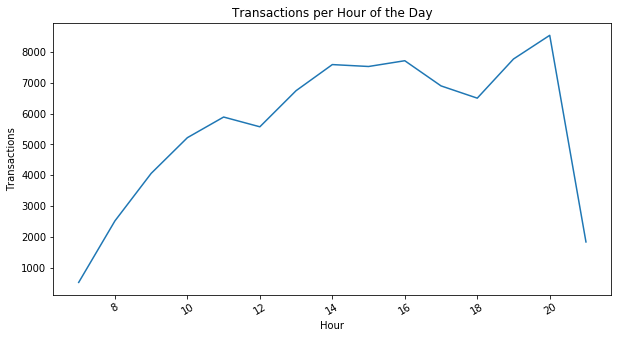

In [16]:
plt.title("Transactions per Hour of the Day")
plt.plot(data_cln.groupby(data_cln.time.dt.hour, sort = True).time.count())
plt.ylabel("Transactions")
plt.xlabel("Hour")
plt.xticks(rotation = 30)
plt.show()

<b>Insights:</b><br>
- No Transactions before 7.<br>
- No Transactions after 22.<br>
- Beginning in the morning the Transactions rise constantly to thier maximum at 20,<br>
- and then abruptly decline.<br>
- The mentioned rise has two significant dents: At 12/13 and 17/18.<br>

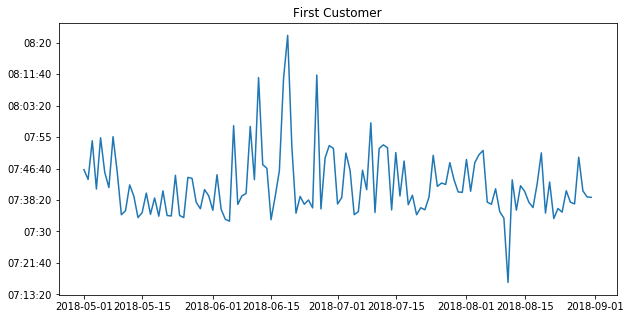

In [17]:
plt.title("First Customer")
plt.plot(data_cln.resample("D", on = "time").min()["time"].dt.time)
plt.ylabel("")
plt.show()

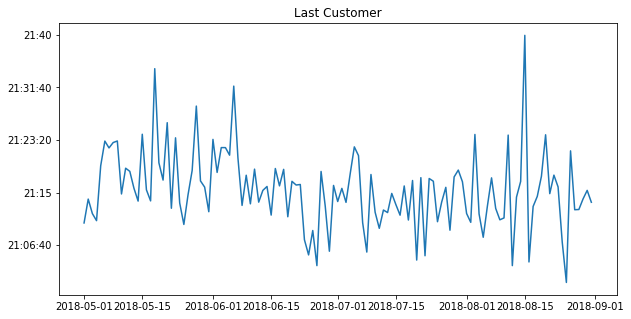

In [18]:
plt.title("Last Customer")
plt.plot(data_cln.resample("D", on = "time").max()["time"].dt.time)
plt.ylabel("")
plt.show()

<b>Assumptions:</b><br>
- The store opens at 07:30 and closes 21:30.<br>

#### 03-01-02 : Price

In [19]:
data_cln.price.describe()

count    84881.000000
mean       189.781109
std        284.032620
min      -1772.900000
25%         38.000000
50%         95.000000
75%        227.700000
max      13263.900000
Name: price, dtype: float64

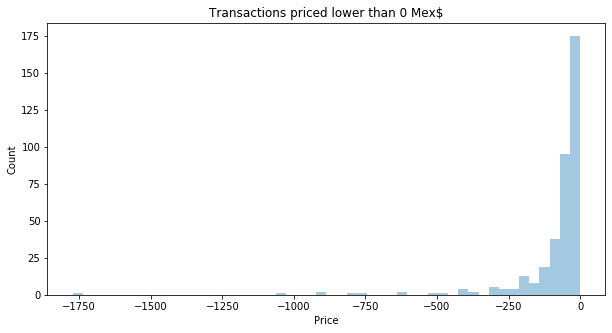

In [20]:
plt.title("Transactions priced lower than 0 Mex$")
sns.distplot(data_cln.price[data_cln.price <= 0] , kde = False)
plt.ylabel("Count")
plt.xlabel("Price")
plt.show()

<b>Insights:</b><br>
- There are transactions with a negative ammount of Mex$.<br>

<b>Assumptions:</b><br>
- These transactions represent instances where the price of the items bought is exceeded by the worth of items handed in (f.e. bottles for recycling). These observations are therefore not faulty values.<br>

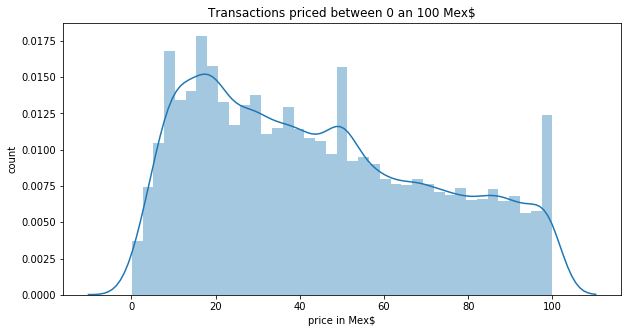

In [21]:
plt.title("Transactions priced between 0 an 100 Mex$")
sns.distplot(data_cln.price[(data_cln.price>=0)&(data_cln.price<=100)])
plt.ylabel("count")
plt.xlabel("price in Mex$")
plt.show()

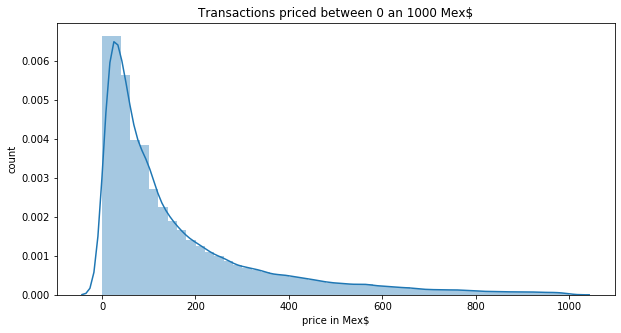

In [22]:
plt.title("Transactions priced between 0 an 1000 Mex$")
sns.distplot(data_cln.price[(data_cln.price>=0)&(data_cln.price<=1000)])
plt.ylabel("count")
plt.xlabel("price in Mex$")
plt.show()

<b>Insights:</b><br>
- The price seems to be normally distributed with the peak around 18 Mex$ and a heavy positive skew.<br>

#### 03-01-03 : Paid

<i>This Feature will be analyzed after the Outlier issues have been solved</i>

In [23]:
data_raw.Pago.describe()

count    8.488100e+04
mean     1.853214e+08
std      3.649937e+10
min      0.000000e+00
25%      5.000000e+01
50%      1.550000e+02
75%      4.000000e+02
max      7.503003e+12
Name: Pago, dtype: float64

#### 03-01-04 : Cashiers

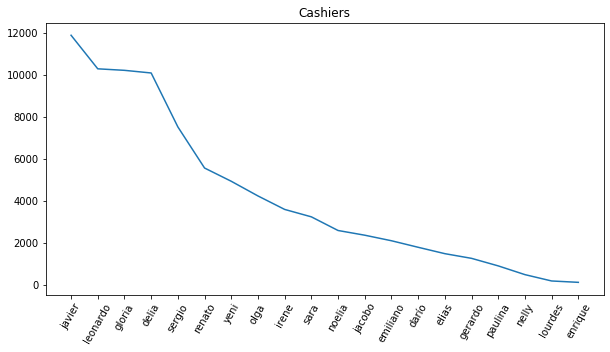

In [24]:
plt.title("Cashiers")
plt.plot(data_cln.cashier.value_counts())
plt.xticks(rotation = 60)
plt.show()

<b>Insights:</b><br>
- 21 Cashiers have been working in that supermarked in the timeperiod.<br>
- 4 of them have checked out more than 10k Transactions. The rest have all less than 7000 Transactions. <br>

### 03-02 : Multiple Feature Analysis

#### 03-02-A : Correlations

<i> Postponed until Paid has been cleaned (outliers) </i>

#### 03-02-B : Time vs Paid

#### 03-02-C : Time vs Price

#### 03-02-D : Time vs Cashier

#### 03-02-E : Paid vs Price

<i> Postponed until Paid has been cleaned (outliers) </i>

#### 03-02-F : Paid vs Cashier

<i> Postponed until Paid has been cleaned (outliers) </i>

#### 03-02-G : Price vs Cashier

## 04 : Applying Queing Theory

In [31]:
def grab_day(day):
    return data_cln[(data_cln.time>=day)&(data_cln.time<=day+dt.timedelta(days=1))]

In [32]:
def show_day(day):
    selected = grab_day(day)
    plt.title(str(day.date())+", a "+str(day.day_name()))
    sns.scatterplot(data = selected, y = "cashier", x = "time")
    plt.xticks(rotation=60)
    plt.show()

In [33]:
def show_shiftplan(day):
    selected            = grab_day(day)
    shift_plan          = pd.DataFrame([])
    shift_start         = selected.groupby("cashier").min()["time"]
    shift_end           = selected.groupby("cashier").max()["time"]
    shift_plan["start"] = shift_start
    shift_plan          = shift_plan.merge(shift_end, on = "cashier", how = "inner")
    shift_plan.rename(columns={"time": "end"}, inplace = True)
    return shift_plan.reset_index()

In [34]:
def check_time(start, end, suspect):
    return((suspect >= start) & (suspect <= end))

In [35]:
def check_shiftplan(shiftplan, suspect):
    result = 0
    for idx in shiftplan.index:
        result += check_time(shiftplan.start[idx], shiftplan.end[idx], suspect)                    
    return result

In [36]:
def find_active_shifts(day):
    shiftplan = show_shiftplan(day)
    results = []
    for idx in grab_day(day).time:
        results.append(check_shiftplan(shiftplan, idx))
    return results

In [37]:
def show_active_shifts(day):
    data         = grab_day(day)
    data["open"] = find_active_shifts(day)
    data         = data.sort_values("time")
    data         = data.reset_index()
    
    plt.title("Active Shifts, includes Breaketime")
    plt.scatter(y = data.open, x = data.time)
    plt.yticks(range(0,data.open.max()+1))
    plt.xlim(data.time.min(),data.time.max())
    plt.show()

## 04-01 : Identifying Parameters

The basic parameters for queuing theory are: The Entry Process, the Service Process and the number of Service Stations.<br>
<b>The Entry Process:</b> A random process determining when the next customer is arriving.<br>
<b>The Service Process:</b> A random process determining how long a customer is processed by a station.<br>
<b>Number of Stations:</b> Number of active stations that are processing customers<br>

### 04-01-01 : Number of Service-Stations

#### 04-01-01-A : Shift = Cashier
The employee sits at the register from his first transaction, until his/ her last. No breaks.

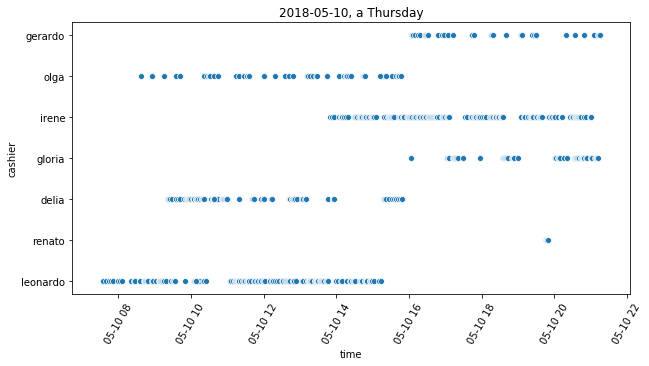

In [38]:
show_day(pd.Timestamp(dt.date(2018,5,10)))

In [39]:
show_shiftplan(pd.Timestamp(dt.date(2018,5,10)))

,cashier,start,end
0,delia,2018-05-10 09:22:24,2018-05-10 15:48:52
1,gerardo,2018-05-10 16:04:13,2018-05-10 21:14:47
2,gloria,2018-05-10 16:03:47,2018-05-10 21:11:39
3,irene,2018-05-10 13:49:17,2018-05-10 21:00:22
4,leonardo,2018-05-10 07:34:26,2018-05-10 15:14:36
5,olga,2018-05-10 08:36:52,2018-05-10 15:46:37
6,renato,2018-05-10 19:45:34,2018-05-10 19:48:57


C:\Users\hrmnn\Anaconda3\envs\HRMNN\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


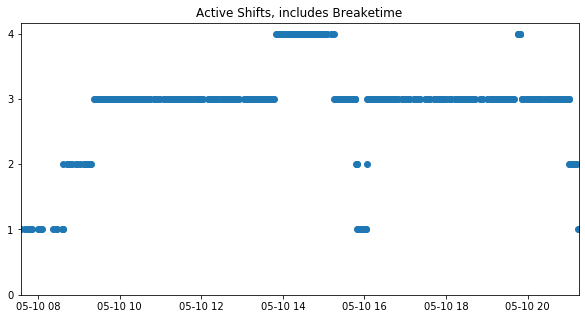

In [40]:
show_active_shifts(pd.Timestamp(dt.date(2018,5,10)))

#### 04-01-02-B : Identifying Breaks

### 04-01-02 : Service Process

#### 04-01-02-A : Stationary
The performance of the cashier is a random variable that does not change with time.

In [41]:
# A) Recieve Shift
# ) Get Differences
# B) Determine Distribution (EXP)
# C) Determine Lambda

#### 04-01-02-B : non-Stationary

### 04-01-03 : Entry Process

#### 04-01-03-A : Stationary and Universal
The random variable, determining the time between each customer entering the queuing-system, does not change intra-day ("stationary") and is not dependent from other factors, like cashier or weekday ("universality").<br>

#### 04-01-03-A : Stationary

#### 04-01-03-B : non-Stationary

## 04-02 : Putting it Together

### 04-02-A : Scenario A
<b>Entry Process:</b> Stationary and Universal<br>
<b>Service Process:</b> Stationary and Universal<br>
<b>Number of Service Stations:</b> Employee is at register from first to last transactions, no breaks<br>

In [42]:
# Entry Process
ende                              = data_cln.resample("D", on = "time").max()["time"]
strt                              = data_cln.resample("D", on = "time").min()["time"]
opnd                              = (ende-strt).dt.total_seconds().sum()
number_of_transactions            = len(data_cln)
total_time                        = opnd
average_time_between_transactions = total_time / number_of_transactions
labda                             = 1 / average_time_between_transactions

In [43]:
# Service Process
result           = pd.DataFrame([])
for idx_cshr in data_cln.cashier.unique():
    test               = data_cln[data_cln.cashier == idx_cshr].sort_values("time").reset_index(drop = True)
    taser              = pd.DataFrame()
    taser["orig_date"] = test.time.dt.date
    taser["shft_date"] = test.time.dt.date.shift()
    taser              = taser[1:].reset_index(drop = True)
    taser["duration"]  = np.diff(test.time)
    result             = result.append(pd.DataFrame(taser[taser.orig_date == taser.shft_date].duration), ignore_index = True)
atbt_at_register = result.mean().dt.total_seconds()
my               = (1 / atbt_at_register).astype(float)[0]

In [44]:
tata         = pd.DataFrame([])
tata["rand"] = stats.expon.rvs(loc = 0, scale = 1/labda, size = 700, random_state = None)
tata["time"] = tata.cumsum()

In [45]:
show_shiftplan(pd.Timestamp(dt.date(2018,5,10)))

,cashier,start,end
0,delia,2018-05-10 09:22:24,2018-05-10 15:48:52
1,gerardo,2018-05-10 16:04:13,2018-05-10 21:14:47
2,gloria,2018-05-10 16:03:47,2018-05-10 21:11:39
3,irene,2018-05-10 13:49:17,2018-05-10 21:00:22
4,leonardo,2018-05-10 07:34:26,2018-05-10 15:14:36
5,olga,2018-05-10 08:36:52,2018-05-10 15:46:37
6,renato,2018-05-10 19:45:34,2018-05-10 19:48:57


## Work in Progress

In [42]:
# 04-01
# Visualize Exit-Process
test = pd.DataFrame(grab_day(pd.Timestamp(dt.date(2018,5,10))).sort_values("time").time).reset_index(drop = True)
test["customer"] = pd.DataFrame(np.cumsum(np.repeat(1,len(test_time)))).reset_index(drop = True)
sns.scatterplot(data = test, x = "time", y = "customer")
plt.xlim([test.time.min(),test.time.max()])
plt.title("Transactions over time / Exit Process")
plt.show()

NameError: name 'test_time' is not defined

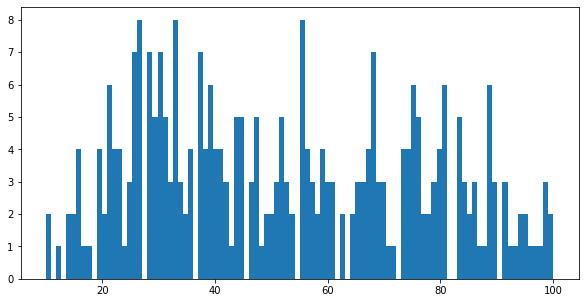

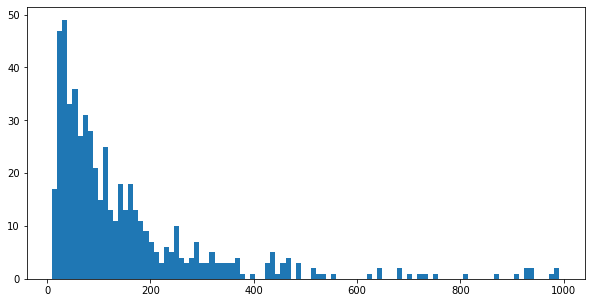

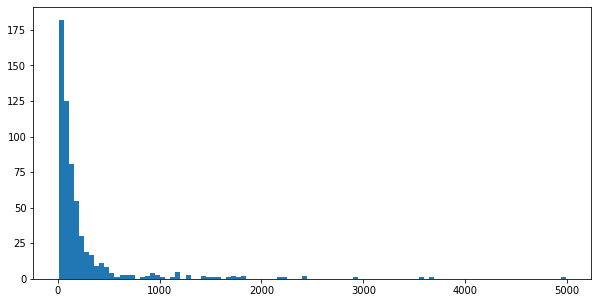

In [43]:
# 04-01-02:
# Determine and Visualize Time between Transactions
lam = grab_day(pd.Timestamp(dt.date(2018,5,10)))
result = pd.DataFrame([])
for idx_csr in lam.cashier.unique():
    shift   = pd.DataFrame(lam[lam.cashier == idx_csr].sort_values("time").reset_index(drop=True)).time
    shift   = pd.DataFrame(np.diff(shift))
    result  = result.append(shift, ignore_index = True)
results = result.sort_values(0).reset_index(drop = True)
results = results[0].astype('timedelta64[s]')
plt.hist(results[results<=100], bins = 100)
plt.show()
plt.hist(results[results<=1000], bins = 100)
plt.show()
plt.hist(results, bins = 100)
plt.show()

In [59]:
https://www.kaggle.com/agasca/analyze-data
https://www.kaggle.com/ector777/cashier-performance-analysis    

In [70]:
results

0        10.0
1        10.0
2        12.0
3        14.0
4        14.0
        ...  
585    2427.0
586    2926.0
587    3561.0
588    3685.0
589    4989.0
Name: 0, Length: 590, dtype: float64

In [92]:
expon.fit(data = results)

(10.0, 226.87627118644068)

In [ ]:
Category 
pd.DataFrame(data['cashier']).astype('category')

## Future Works

<b>Overall Project</b><br>
- Polish Code<br>
- Create common Vocabulary<br>
- Come up with Supermarket related pun as project title<br>
- Comment Code<br>
- Short + Long Notbook<br>
- Consider visualizing with bookeh<br>
- Peer Review<br>
- Additional Opportunities for Machine Learning<br>
- Finish readme<br>
- Presentation<br>

<b>Cleaning</b><br>
- Handle Outliers (=price, regression model, maybe based on Mex$ coins/ bills)<br>

<b>Analysis</b><br>
- Labor Day and all days used?<br>
- Systematically splitter Time<br>
- Add Histograms to 03-01-01 = Analyse Frequency<br>
- Create Multiplot for 03-01-02<br>
- Confirm Assumption on Opening Hours for all weekdays<br>
- Estimate Shopping Time via OH vs First Transaction
- "Observations per Week (only full weeks)" apply .isocalendar()[1]<br>
- Fix 03-01-01 Warning ("converter")<br>
- Analysis of Gender<br>
- Effects of Daylight Savingstime<br>

<b>Apply Queing Theory</b><br>
- Scenario Alpha: Push Used Numbers up to Analysis<br>
- Service-Station: Vacant vs (Idle vs Working): No Diffrence -> Assoumption based on time -> Deduce from Supermarket Busyness (of other Stations + Total)
- Quick Intro to QT<br>
- Service Process (Stationary vs Nonstationary, Independent vs Dependent(Price, Cashier, Paid, Weekday, Month, etc.))
- Entry Process(Stationary vs Nonstationary, Indpendent vs Dependent(Price, Cashier, Paid, Weekday, Month, etc.)
- Entry Process (Shopping Time)
- Evaluation of Settings (= Compare Exit Processes)<br>
- Queing Networks (= Multiple queues)<br>
- y Ticks Format Dayview<br>